In [1]:
import sys
sys.path.append('/Applications/Stata/utilities')
from pystata import config
config.init('se')

[0.003s][warning][os,thread] Attempt to protect stack guard pages failed (0x000000016b59c000-0x000000016b5a8000).
[0.003s][warning][os,thread] Attempt to deallocate stack guard pages failed.

  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 21 Sep 2023
Serial number: 401709301720
  Licensed to: Dhruv Akshay Pandit
               ISEG

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000; see help set_maxvar.


In [2]:
%%stata
use "/Users/dhruvpandit/Documents/GitHub/ISEG_AEF/Spatial Econometrics/Notebooks/boston_tracts.dta"


In [3]:
%%stata
spset


      Sp dataset: boston_tracts.dta
Linked shapefile: boston_tracts_shp.dta
            Data: Cross sectional
 Spatial-unit ID: _ID
     Coordinates: _CX, _CY (planar)


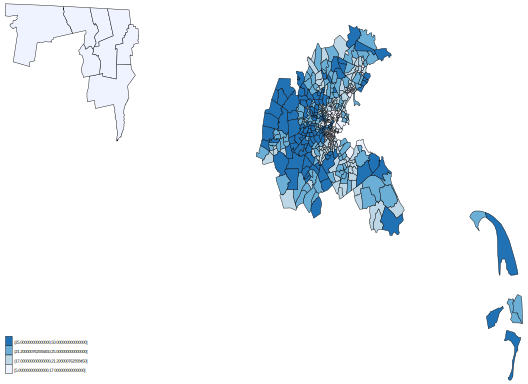

In [4]:
%%stata
grmap CMEDV

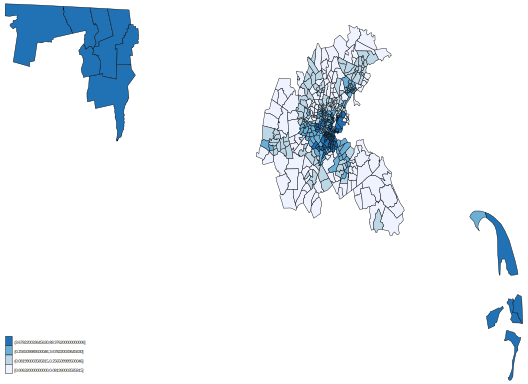

In [5]:
%%stata
grmap CRIM

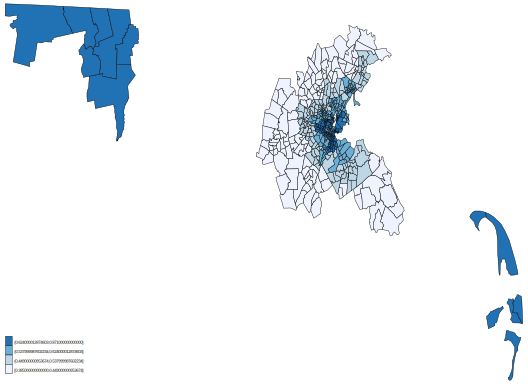

In [6]:
%%stata
grmap NOX

In [7]:
%%stata
spmatrix create contiguity W, normalize(row)

In [8]:
%%stata
spmatrix summarize W


Weighting matrix W
---------------------------------------
           Type |           contiguity
  Normalization |                  row
      Dimension |            506 x 506
Elements        |
   minimum      |                    0
   minimum > 0  |             .0666667
   mean         |             .0019763
   max          |                    1
Neighbors       |
   minimum      |                    1
   mean         |             5.762846
   maximum      |                   15
---------------------------------------


In [9]:
%%stata
quietly regress CMEDV
estat moran, errorlag(W)



. quietly regress CMEDV

. estat moran, errorlag(W)

Moran test for spatial dependence
         H0: Error terms are i.i.d.
         Errorlags:  W

         chi2(1)      =   546.53
         Prob > chi2  =   0.0000

. 


In [10]:
%%stata
global xlist CRIM RM INDUS NOX AGE DIS RAD PTRATIO LSTAT TAX CHAS_num
regress CMEDV $xlist


. global xlist CRIM RM INDUS NOX AGE DIS RAD PTRATIO LSTAT TAX CHAS_num

. regress CMEDV $xlist

      Source |       SS           df       MS      Number of obs   =       506
-------------+----------------------------------   F(11, 494)      =    122.45
       Model |  31152.6186        11  2832.05624   Prob > F        =    0.0000
    Residual |  11425.1201       494  23.1277735   R-squared       =    0.7317
-------------+----------------------------------   Adj R-squared   =    0.7257
       Total |  42577.7387       505  84.3123539   Root MSE        =    4.8091

------------------------------------------------------------------------------
       CMEDV | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        CRIM |  -.1095411    .032953    -3.32   0.001    -.1742864   -.0447958
          RM |   3.866194   .4160963     9.29   0.000     3.048657    4.683731
       INDUS |  -.0068519   .061

In [11]:
%%stata
estat moran, errorlag(W)


Moran test for spatial dependence
         H0: Error terms are i.i.d.
         Errorlags:  W

         chi2(1)      =   207.75
         Prob > chi2  =   0.0000


In [12]:
%%stata
ssc install spautoreg

checking spautoreg consistency and verifying not already installed...
installing into /Users/dhruvpandit/Library/Application Support/Stata/ado/plus/.
> ..
installation complete.


In [18]:
%%stata
spmatrix export W using wmat.txt, replace
* Delete the first number in wmat.txt
* transform wmat.txt into stata format



. spmatrix export W using wmat.txt, replace
  (matrix W saved in file wmat.txt)

. * Delete the first number in wmat.txt
. * transform wmat.txt into stata format
. 


In [24]:
%%stata 
clear
import delimited "wmat.txt", delimiter(space, collapse) encoding(Big5)


. clear

. import delimited "wmat.txt", delimiter(space, collapse) encoding(Big5)
(507 vars, 507 obs)

. 


In [26]:
%%stata
drop v1
drop in 1
save "wmat.dta"


. drop v1

. drop in 1
(1 observation deleted)

. save "wmat.dta"
file wmat.dta saved

. 


In [29]:
%%stata
use "/Users/dhruvpandit/Documents/GitHub/ISEG_AEF/Spatial Econometrics/Notebooks/boston_tracts.dta"
spset



. use "/Users/dhruvpandit/Documents/GitHub/ISEG_AEF/Spatial Econometrics/Notebo
> oks/boston_tracts.dta"

. spset

      Sp dataset: boston_tracts.dta
Linked shapefile: boston_tracts_shp.dta
            Data: Cross sectional
 Spatial-unit ID: _ID
     Coordinates: _CX, _CY (planar)

. 


In [36]:
%%stata
spmatrix create contiguity W, normalize(row)

In [34]:
%%stata
global xlist CRIM RM INDUS NOX AGE DIS RAD PTRATIO LSTAT TAX CHAS_num
spautoreg CMEDV $xlist, wmfile(wmat) model(sac) lmspac


. global xlist CRIM RM INDUS NOX AGE DIS RAD PTRATIO LSTAT TAX CHAS_num

. spautoreg CMEDV $xlist, wmfile(wmat) model(sac) lmspac

*** Binary (0/1) Weight Matrix: 506x506 (Non Normalized)

initial:       log likelihood = -1506.6646
rescale:       log likelihood = -1506.6646
rescale eq:    log likelihood = -1506.6646
Iteration 0:   log likelihood = -1506.6646  (not concave)
Iteration 1:   log likelihood = -1429.9039  
Iteration 2:   log likelihood =  -1418.127  
Iteration 3:   log likelihood = -1412.7452  
Iteration 4:   log likelihood = -1412.7008  
Iteration 5:   log likelihood = -1412.7008  
* MLE Spatial AutoCorrelation Normal Model (SAC)
  CMEDV = CRIM + RM + INDUS + NOX + AGE + DIS + RAD + PTRATIO + LSTAT +
        TAX + CHAS_num
------------------------------------------------------------------------------
  Sample Size       =         506   |   Cross Sections Number   =       
  Wald Test         =   1223.4319   |   P-Value > Chi2(11)      =      0.0000
  F-Test            =   

In [37]:
%%stata
spregress CMEDV $xlist, ml dvarlag(W) errorlag(W) vce(robust)

  (506 observations)
  (506 observations (places) used)
  (weighting matrix defines 506 places)

Performing grid search ... finished 

Optimizing concentrated log pseudolikelihood:

Iteration 0:   log pseudolikelihood = -1413.1525  
Iteration 1:   log pseudolikelihood = -1412.7039  
Iteration 2:   log pseudolikelihood = -1412.7008  
Iteration 3:   log pseudolikelihood = -1412.7008  

Optimizing unconcentrated log pseudolikelihood:

Iteration 0:   log pseudolikelihood = -1412.7008  
Iteration 1:   log pseudolikelihood = -1412.7008  (backed up)

Spatial autoregressive model                            Number of obs =    506
Maximum likelihood estimates                            Wald chi2(12) = 813.47
                                                        Prob > chi2   = 0.0000
Log pseudolikelihood = -1412.7008                       Pseudo R2     = 0.7132

------------------------------------------------------------------------------
             |               Robust
       CMEDV | Coe

In [38]:
%%stata
test INDUS CHAS_num


 ( 1)  [CMEDV]INDUS = 0
 ( 2)  [CMEDV]CHAS_num = 0

           chi2(  2) =    0.36
         Prob > chi2 =    0.8346


In [42]:
%%stata
quietly spregress CMEDV $xlist, ml dvarlag(W) errorlag(W)
estimates store Mod1


. quietly spregress CMEDV $xlist, ml dvarlag(W) errorlag(W)

. estimates store Mod1

. 


In [43]:
%%stata
global xlistr CRIM RM NOX AGE AGESQ DIS RAD PTRATIO LSTAT TAX
spregress CMEDV $xlistr, ml dvarlag(W) errorlag(W)
estimates store Mod0
lrtest Mod1 Mod0


. global xlistr CRIM RM NOX AGE AGESQ DIS RAD PTRATIO LSTAT TAX

. spregress CMEDV $xlistr, ml dvarlag(W) errorlag(W)
  (506 observations)
  (506 observations (places) used)
  (weighting matrix defines 506 places)

Performing grid search ... finished 

Optimizing concentrated log likelihood:

Iteration 0:   log likelihood = -1412.6372  
Iteration 1:   log likelihood =  -1412.149  
Iteration 2:   log likelihood = -1412.1446  
Iteration 3:   log likelihood = -1412.1446  

Optimizing unconcentrated log likelihood:

Iteration 0:   log likelihood = -1412.1446  
Iteration 1:   log likelihood = -1412.1446  (backed up)

Spatial autoregressive model                            Number of obs =    506
Maximum likelihood estimates                            Wald chi2(11) = 819.70
                                                        Prob > chi2   = 0.0000
Log likelihood = -1412.1446                             Pseudo R2     = 0.7143

--------------------------------------------------------------

In [41]:
%%stata
lrtest Mod1 Mod0


Likelihood-ratio test
Assumption: Mod0 nested within Mod1

 LR chi2(1) =  -1.11
Prob > chi2 = 1.0000


In [44]:
%%stata
spregress CMEDV $xlist, gs2sls dvarlag(W) errorlag(W)


(506 observations)
  (506 observations (places) used)
  (weighting matrix defines 506 places)

Estimating rho using 2SLS residuals: 

initial:       GMM criterion =  16.424386
alternative:   GMM criterion =   1.492355
rescale:       GMM criterion =   1.492355
Iteration 0:   GMM criterion =   1.492355  
Iteration 1:   GMM criterion =  .28557031  
Iteration 2:   GMM criterion =  .27992469  
Iteration 3:   GMM criterion =  .27992457  

Estimating rho using GS2SLS residuals: 

Iteration 0:   GMM criterion =  .02286695  
Iteration 1:   GMM criterion =  .01376905  
Iteration 2:   GMM criterion =  .01376891  
Iteration 3:   GMM criterion =  .01376891  

Spatial autoregressive model                           Number of obs =     506
GS2SLS estimates                                       Wald chi2(12) = 1173.33
                                                       Prob > chi2   =  0.0000
                                                       Pseudo R2     =  0.7179

----------------------------

In [46]:
%%stata
test CHAS_num INDUS
spregress CMEDV $xlistr, gs2sls dvarlag(W) errorlag(W)


. test CHAS_num INDUS

 ( 1)  [CMEDV]CHAS_num = 0
 ( 2)  [CMEDV]INDUS = 0

           chi2(  2) =    1.80
         Prob > chi2 =    0.4067

. spregress CMEDV $xlistr, gs2sls dvarlag(W) errorlag(W)
  (506 observations)
  (506 observations (places) used)
  (weighting matrix defines 506 places)

Estimating rho using 2SLS residuals: 

initial:       GMM criterion =  19.223571
alternative:   GMM criterion =  1.0909856
rescale:       GMM criterion =  1.0909856
Iteration 0:   GMM criterion =  1.0909856  
Iteration 1:   GMM criterion =  .26574702  
Iteration 2:   GMM criterion =  .26297678  
Iteration 3:   GMM criterion =  .26297671  

Estimating rho using GS2SLS residuals: 

Iteration 0:   GMM criterion =  .02214202  
Iteration 1:   GMM criterion =  .01332926  
Iteration 2:   GMM criterion =  .01332916  

Spatial autoregressive model                           Number of obs =     506
GS2SLS estimates                                       Wald chi2(11) = 1136.63
                               

In [47]:
%%stata
estat impact


progress   : 10%  20%  30%  40%  50%  60%  70%  80%  90% 100% 

Average impacts                                 Number of obs     =        506

------------------------------------------------------------------------------
             |            Delta-Method
             |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
direct       |
        CRIM |  -.0961324   .0297346    -3.23   0.001     -.154411   -.0378537
          RM |   4.683133   .3855821    12.15   0.000     3.927406     5.43886
         NOX |  -14.60609   4.239118    -3.45   0.001    -22.91461   -6.297572
         AGE |  -.0908555   .0391608    -2.32   0.020    -.1676093   -.0141017
       AGESQ |   .0006237   .0003315     1.88   0.060    -.0000261    .0012735
         DIS |  -1.265398   .2091465    -6.05   0.000    -1.675318   -.8554782
         RAD |   .2497979   .0685688     3.64   0.000     .1154055    .3841904
     PTRATI